## Introduction to working with pharmacogenomic data and Jupyter notebooks

### *A short hands-on guide for exploring pharmacogenomic data using python scripts*

In today's workshop we will have a quick overview on how to extract data from public ressources in the field of pharmacogenomics and how to explore aggregated and individual pharmacogenomic testing information with Jupyter notebooks.

The workshop will be divided in roughly 3 parts:

- Introduction to Jupyter notebooks and PharmGKB drug label data (20 min)
- Data preparation and data exploration of clinical variants (20 min)
- Focused assessment of mutations in a specific protein (20 min)
- Your investigation of a specific disease area for a PGx report (20 min)

These are the learning objectives of today's workshop:

- General data handling concepts including data aggregation and visualization through a glimpse into Jupyter Notebooks
- Overview of the publicly available pharmacogenomic data landscape
- Understanding the different types of variations and their possible effect on drug response


To make things easier you find a range of icons througout this notebook. They roughly correspond to the following:

- 🎯: Plan of action
- 💡: Useful information
- 💥: Action point or own reflections required
- 📌: Interpretations of results
- ❗️: Watch out!

## Jupyter Notebooks

💡 The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

❗️ This is an interactive notebook, which means you are able to run the code that is written in each of the cells.

There are two types od cells:
1. **Markdown**, which is a lightweight markup language for creating formatted text
2. **Code**, executable python code

❗️ Wheneve ryou see a **#** in a **Code** cell, then this is not excecuted, but rather serves as documentation to explain the code


#### Running python code in this notebook

<div class="alert alert-info" role="alert">

❗️ **To run the code in a cell, you should:**
- Place your mouse cursor in the cell, and click (this gives the cell *focus*) to make it active
- Hold down the <b>Shift</b> key, and press the <b>Return</b> key.

If this is successful, you should see the input marker to the left of the cell change from

```
In [ ]:
```

to (for example)

```
In [1]:
```

and you may see output appear below the cell.

## PharmGKB

🎯 Lets start by looking into PharmGKB, a publicly available online knowledge base responsible for the aggregation, curation, integration and dissemination of knowledge regarding the impact of human genetic variation on drug response.

[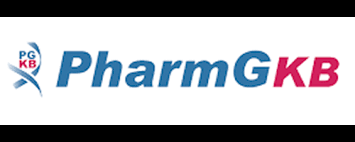](https://www.pharmgkb.org/)

We are going to look at two files from [PharmGKB](https://www.pharmgkb.org/downloads):
1. The "[drugLabels.zip](https://www.pharmgkb.org/page/downloadLabelHelp)", which contains drug label annotations form major drug agencies (e.g the FDA, EMA etc.)
2. The "[clinicalVariants.zip](https://www.pharmgkb.org/page/downloadClinicalVariantHelp)", which contains a list of variant-drug pairs and level of evidence for all clinical annotations

❗️But before we can start, we need to pull some necessary data file and load and install additional packages into our Jupyter notebook:

In [1]:
!git clone https://github.com/AlexanderHauser/MIND-PGx-workshop

Cloning into 'MIND-PGx-workshop'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 13), reused 20 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 3.04 MiB | 3.43 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
import pandas as pd # data manipulation and analysis
import re # regular expressions
import numpy as np # support for high-level mathematical functions

import matplotlib.pyplot as plt # plotting library
import seaborn as sns # API on top of Matplotlib

# Pandas custom display options:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', 40)

In [3]:
!pip install py3Dmol

import py3Dmol
from ipywidgets import interact, IntSlider, widgets # allows interactive widgets
from IPython.display import display

## 1. **Drug Label annotations**

🎯 We start by loading the **drugLabels** data into a pandas dataframe and start exploring!

🎯 We are looking at the top 5 entries from this table with >1,200 drug-label pairs from different agencies

In [13]:
# Load data and take a look
dl_merge = pd.read_csv("/content/MIND-PGx-workshop/data/drugLabels.tsv", delimiter='\t')
dl_merge.head()

,PharmGKB ID,Name,Source,Biomarker Flag,Testing Level,Has Prescribing Info,Has Dosing Info,Has Alternate Drug,Has Other Prescribing Guidance,Cancer Genome,Prescribing,Chemicals,Genes,Variants/Haplotypes,Latest History Date (YYYY-MM-DD)
0,PA166269401,Annotation of EMA Label for nateglin...,EMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nateglinide,CYP2C9,NaN,2023-11-21
1,PA166269701,Annotation of EMA Label for glycerol...,EMA,NaN,Testing Required,NaN,NaN,NaN,NaN,NaN,NaN,glycerol phenylbutyrate,ARG1; ASL; ASS1; CPS1; OTC,NaN,2024-08-07
2,PA166273281,Annotation of EMA Label for nusiners...,EMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nusinersen,SMN2,NaN,2023-08-17
3,PA166273261,Annotation of EMA Label for ospemife...,EMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ospemifene,CYP2B6; CYP2C9,NaN,2024-12-13
4,PA166271261,Annotation of EMA Label for tegafur ...,EMA,NaN,Testing Recommended,Prescribing Info,NaN,Alternate Drug,NaN,NaN,Prescribing,tegafur / gimeracil / oteracil,DPYD,"DPYD c.1129-5923C>G, c.1236G>A (HapB...",NaN


📌 ➙ We see that there is a lot of information for a lot of drugs with annotations in PharmGKB. We want to start by looking at all the drugs with *Informative PGx*, *Actionable PGx*, *Testing required*, or *Testing recommended* from the different drug agencies.

Text(0.5, 0, 'Drug agencies')

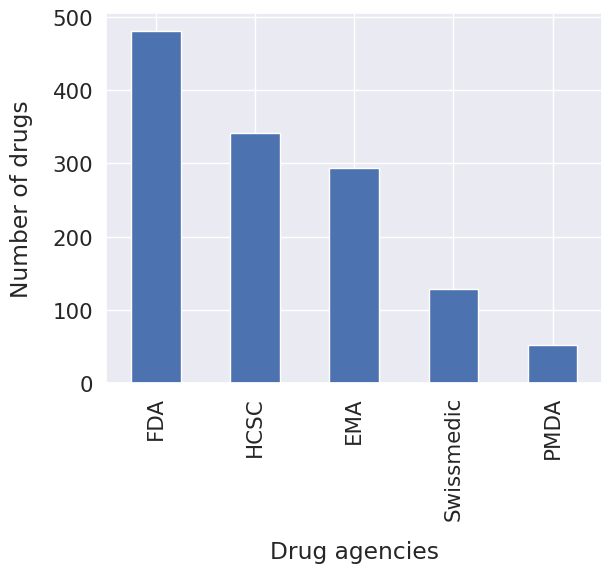

In [14]:
sns.set(font_scale=1.4)
dl_merge[['Source', 'Name']].drop_duplicates()['Source'].value_counts().plot(kind='bar')
plt.ylabel("Number of drugs", labelpad=14)
plt.xlabel("Drug agencies", labelpad=14)

💡
**FDA**: U.S. Food and Drug Administration
**EMA**: European Medicines Agency
**PMDA**: Japanese Pharmaceuticals and Medical Devices Agency
**HCSC**: Health Canada (Sant  Canada)
**Swissmedic**, Swiss Agency of Therapeutic Products.

📌 ➙  We see that most pharmacogenetic product labels are provided by the FDA.

💡 There are different testing "levels" for a given drug, such as:

**1. Testing required:**
The label states or implies that some sort of gene, protein or chromosomal testing, including genetic testing, functional protein assays, cytogenetic studies, etc., should be conducted before using this drug. This requirement may only be for a particular subset of patients. PharmGKB considers labels that state the variant is an indication for the drug, as implying a test requirement. If the label states a test "should be" performed, this is also interpreted as a requirement.

**2. Testing recommended:**
The label states or implies that some sort of gene, protein or chromosomal testing, including genetic testing, functional protein assays, cytogenetic studies, etc., is recommended before using this drug. This recommendation may only be for a particular subset of patients. PharmGKB considers labels that say testing "should be considered" or "Consider genotyping or phenotyping" to be recommending testing.

**3. Actionable PGx:**
The label may contain information about changes in efficacy, dosage, metabolism or toxicity due to gene/protein/chromosomal variants or phenotypes (e.g. "poor metabolizers"). Or the label may mention contraindication of the drug in a particular subset of patients with particular variants/genotypes/phenotypes. However, the label does not require or recommend gene, protein or chromosomal testing.

**4. Informative PGx:**
The label contains information stating that particular gene/protein/chromosomal variants or metabolizer phenotypes do not affect a drug’s efficacy, dosage, metabolism or toxicity. Or, the label states that particular variants or phenotypes affect a drug’s efficacy, dosage, metabolism or toxicity, but this e💡ffect is not “clinically” significant OR The label appears or appeared on the FDA Biomarker List but does not currently meet the requirements to be assigned as “Testing required”, “Testing recommended” or “Actionable PGx”. PharmGKB annotates every label that appears on the FDA Biomarker list, regardless of whether we would otherwise annotate the label.

**5. No Clinical PGx :**
The label contains information stating that particular genes/proteins/variants or metabolizer phenotypes do not affect a drug’s efficacy, dosage, metabolism or toxicity. Or, the label states that particular variants or phenotypes affect a drug’s efficacy, dosage, metabolism or toxicity, but this effect is not “clinically significant".

🎯 So let's look how many drugs fall into which category:


<Axes: xlabel='Number of drugs', ylabel='Testing Level'>

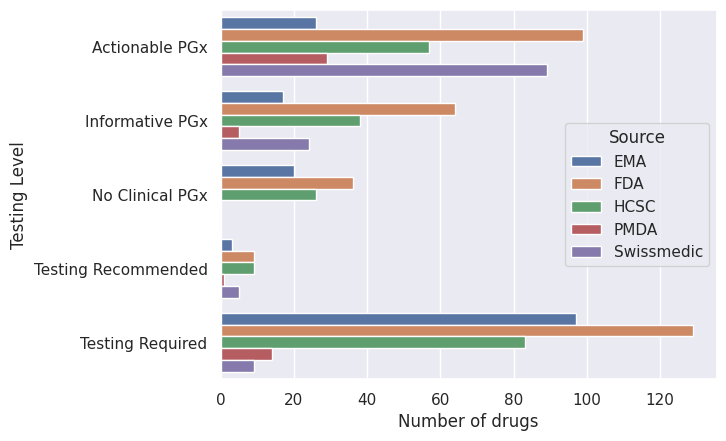

In [12]:
sns.set(font_scale=1.0)
df_action = dl_merge[['Testing Level', 'Source', 'Name']].drop_duplicates().groupby(['Testing Level', 'Source']).size().reset_index(name='Number of drugs')

sns.barplot(y='Testing Level', x='Number of drugs', hue='Source', data=df_action)

📌 ➙  There seems to be a lot of actionable and informative PGx drug labels, with just about 120 drugs with *required* PGx testing for (sometimes a particular subset of) patients.

🎯 Let's take a look at the rough indication areas for the *required testing* drugs.

🎯 In order to do that we use a table with additional information such as the [Anatomical Therapeutic Chemical (ATC) Classification](https://www.who.int/tools/atc-ddd-toolkit/atc-classification) for each drug compounds from
[<img src="https://go.drugbank.com/assets/logo-white-dd185d748ee0164b8ee8f88df29235cd8cfc7936a3c974589262c667e9294219.svg" style="width:20px;">](https://go.drugbank.com/)

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Drugbank_logo.svg/320px-Drugbank_logo.svg.png" style="width:20px;">](https://www.pharmgkb.org/)

[Text(0.5, 1.0, 'Drugs with required PGx tests by disease area')]

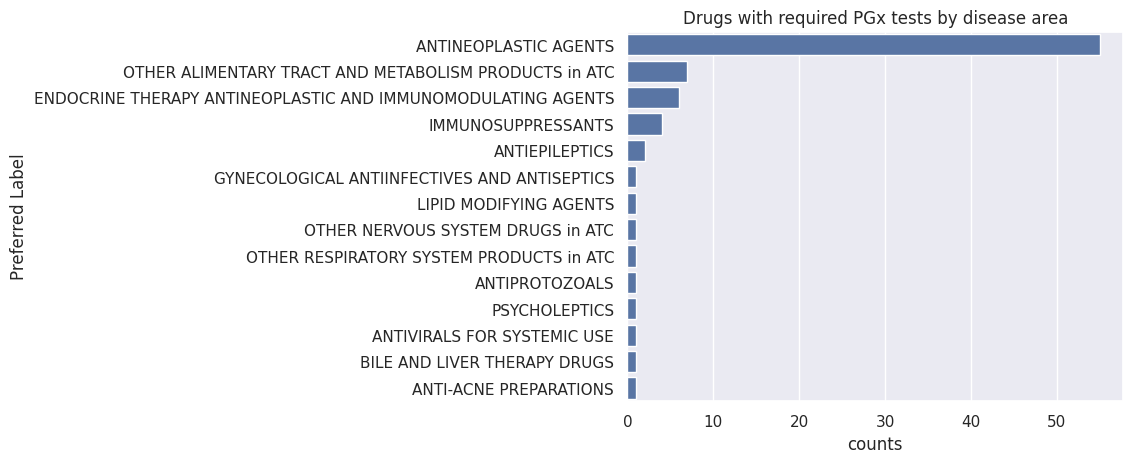

In [19]:
dl_merge = pd.read_csv("/content/MIND-PGx-workshop/data/drugLabels_drugbank.csv")
atc = pd.read_csv("/content/MIND-PGx-workshop/data/ATC_system.csv")
atc['atc'] =  atc['Class ID'].str.split('/', expand=True)[5]

# Use only the high level ATC code, i.e. the first 3 characters
dl_merge['atc_3'] = dl_merge.atc_codes.apply(eval).apply(lambda x: x[0][:3] if len(x) >0 else 'nan')

# Focus on 'Testing required' here:
atc_counts = dl_merge[dl_merge['Testing Level']=='Testing required'][['Chemicals', 'atc_3']].drop_duplicates()['atc_3'].value_counts().head(20).rename_axis('atc_3').to_frame('counts')

atc_df = atc_counts.merge(atc[['Preferred Label', 'atc']], left_index=True, right_on = 'atc')

sns.set(font_scale=1.0)
sns.barplot(y='Preferred Label', x='counts', data=atc_df).set(title='Drugs with required PGx tests by disease area')

📌 ➙ No surprise: A great majority of PGx required tests are for cancer medications.

💥 What are the most common disease areas for informative or actionable PGx labels (perhaps those up and coming)? To investigate this, you should change the code above to "Informative PGx" and/or "Actionable PGx" at the right place

🎯 Let's look at the most frequently labeld variant with *Testing required* information:

In [22]:
# Output the top genetic variant with the most drug-variant associations
dl_merge[dl_merge['Testing Level']=='Testing required'][['Chemicals', 'Variants/Haplotypes']].drop_duplicates()['Variants/Haplotypes'].value_counts().head(1)

,count
Variants/Haplotypes,
rs113488022,7


📌💡 ➙ the **rs113488022** variant (V600E) is a mutation of the BRAF gene in which valine (V) is substituted by glutamic acid (E) at amino acid 600. It is a well known driver mutation in melanoma and an important diagnostic variant for cancer PGx. The V600E variant protein has elevated kinase activity that transforms cells and generates tumors [(Davies et al, 2002; Nature)](dx.doi.org/10.1038%2Fnature00766). This discovery led to the development and approval of the BRAF V600E inhibitor vemurafenib.

💥 Can you identify some non-cancer related variant-drug annotations? You can change the ".head(1)" filter in the above code and could search for variant/haplotype identifiers directly in [PharmGKB](https://www.pharmgkb.org/) or e.g. in [SNPedia](https://www.snpedia.com/index.php/SNPedia)

## 2. **Clinical Variant annotations**

🎯 Now, we want to look at all annotated variant-drug pairs beyond those with clinical labels by drug agencies. PharmGKB curates each association and classifies them into **levels of evidence**.

In [ ]:
df_clinicalraw = pd.read_csv("/content/MIND-PGx-workshop/data/clinicalVariants.tsv", sep='\t')
df_clinicalraw.head() # Show just some top examples

,variant,gene,type,level of evidence,chemicals,phenotypes
0,"CYP2C9*1, CYP2C9*2, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,meloxicam,NaN
1,"CYP2C9*1, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,lornoxicam,NaN
2,"CYP2C9*1, CYP2C9*2, CYP2C9*3",CYP2C9,Metabolism/PK,1A,siponimod,NaN
3,rs17376848,DPYD,Toxicity,1A,capecitabine,Neoplasms
4,rs2297595,DPYD,Toxicity,1A,capecitabine,Neoplasms


📌 ➙ for each row we find information on every annotated variant/haplotype pair with information on the level of evidence

💡 PharmGKBs assigns [clinical annotation levels of evidence](https://www.pharmgkb.org/page/clinAnnLevels) (LOE)

[<img src="https://s3.pgkb.org/attachment/CA_Levels_of_Evidence.svg" style="width:300px;">](https://www.pharmgkb.org/page/clinAnnLevels)

🎯 Let's take a look at the level of evidence for different protein targets:

In [ ]:
print(f'Number of genes with PGx drug-variant information: {df_clinicalraw.gene.nunique()}')

print(f'Number of unique variant/haplotypes: {df_clinicalraw.variant.nunique()}')

print('\nTop 5 genes with the highest number of drug-gene annotations:')
print(df_clinicalraw[(df_clinicalraw['level of evidence'] == '1A')].groupby('gene')['chemicals'].nunique().reset_index(name='count').sort_values(by='count', ascending=False).head(5))

# preview some data (top 3) for the most prevelant CYP2D6 gene:
df_clinicalraw[(df_clinicalraw['gene'] == 'CYP2D6')].head(3)

Number of genes with PGx drug-variant information: 1052
Number of unique variant/haplotypes: 3005

Top 5 genes with the highest number of drug-gene annotations:
       gene  count
5   CYP2D6   24   
3   CYP2C19  14   
4   CYP2C9   10   
0   CACNA1S  7    
13  HLA-B    6    


,variant,gene,type,level of evidence,chemicals,phenotypes
25,"CYP2D6*1, CYP2D6*2, CYP2D6*4, CYP2D6*5, CYP2D6*17, CYP2D6*41",CYP2D6,Metabolism/PK,1A,hydrocodone,NaN
26,"CYP2D6*1, CYP2D6*1xN, CYP2D6*2, CYP2D6*2xN, CYP2D6*4, CYP2D6*5, CYP2D6*10, CYP2D6*35xN",CYP2D6,Efficacy,1A,ondansetron,Vomiting
27,"CYP2D6*1, CYP2D6*1xN, CYP2D6*2xN",CYP2D6,Efficacy,1A,tropisetron,Vomiting


📌 ➙ There are a number of genes and variants for which there is some evidence to support alternative drug response for carriers of a specific genotype

💥 Can you reuse/modify the above code to find the number of unique **chemicals** (drugs) for which there is evidence for drug response variability? Are you surprised by this number?

💥 Do you have a favourite gene/protein? Maybe a gene/protein you work with?. Is there any reported pharmacogenomic evidence for this gene/protein? Change the code at the bottom of the section above!

🎯 After you have looked at your own genes/proteins of interest. Let's now look at the aggregated gene/protein landscape. Which protein families are most often implicated in pharmacogenomics? In order to do so, we need information on the protein family, which we can obtain from:  [<img src="https://www.uniprot.org/uniprot-logo.img.0df091.svg" style="width:25px;">](https://www.uniprot.org/).

Text(0.5, 0, 'Number of drug-variant associations')

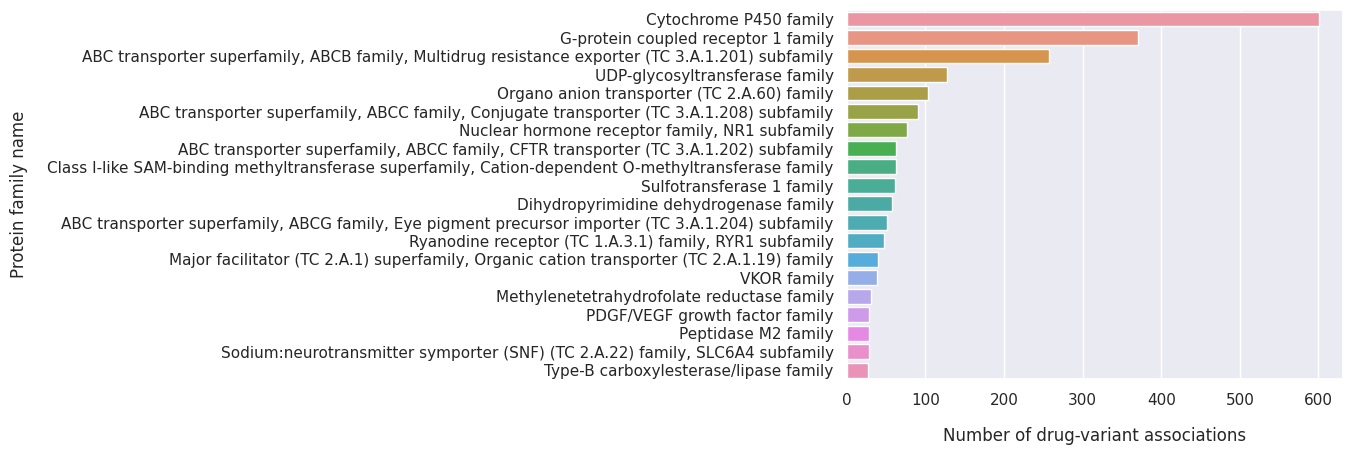

In [ ]:
uniprot_df = pd.read_csv("/content/MIND-PGx-workshop/data/uniprot-proteome.tsv", sep="\t")

# Merge the uniprot information with the PharmGKB data frame. Use only variants that can be mapped to a specific gene:
df_clinicalraw_uniprot = df_clinicalraw[df_clinicalraw.gene.notnull()].merge(uniprot_df, left_on='gene', right_on='Gene names  (primary )')

top_families = df_clinicalraw_uniprot['Protein families'].value_counts().head(20).rename_axis('name').to_frame('counts').reset_index()

sns.set(font_scale=1.0)
sns.barplot(y='name', x='counts', data=top_families)
plt.ylabel("Protein family name", labelpad=14)
plt.xlabel("Number of drug-variant associations", labelpad=14)

In [ ]:
# List the most frequent protein families for each level of evidence
pd.set_option('display.max_colwidth', 40)
top_3_fams_loe = df_clinicalraw_uniprot.groupby(['Protein families', 'level of evidence']).size().sort_values().to_frame('counts').reset_index().sort_values(by=['level of evidence','counts'], ascending=[True, False]).groupby('level of evidence').head(3)
print(top_3_fams_loe)

                            Protein families level of evidence  counts
649                   Cytochrome P450 family                1A      81
643  Ryanodine receptor (TC 1.A.3.1) fami...                1A      44
642   Dihydropyrimidine dehydrogenase family                1A      43
532                   Cytochrome P450 family                1B       6
489                              VKOR family                1B       4
402           UDP-glycosyltransferase family                1B       2
615                   Cytochrome P450 family                2A      16
569                              VKOR family                2A       8
509     Arylamine N-acetyltransferase family                2A       5
354                       HAM1 NTPase family                2B       2
381  Protein kinase superfamily, Tyr prot...                2B       2
384    Type-B carboxylesterase/lipase family                2B       2
655                   Cytochrome P450 family                 3     449
654   

📌 ➙ Clearly, most variant-drug annotations are found for the metabolizing Cytochrome P450 enzyme family, i.e. with effect on the Pharmakokinetics. Less is known about the effect on variability in drug targets, i.e. the pharmacodynamics. For instance, there is a large group of annotations for G-protein coupled receptors and drug transporters.

💡 Depending on your variant/haplotype profile you are metabolyzing different drugs differently:

[<img src="https://www.annesmigraene.dk/wp-content/uploads/2020/04/metabolizers-engelsk-1024x616.png" style="width:400px;">]()



## **Variant specific investigation**

🎯 While we identified a number of genetic variations associated with a range of metabolizing enzymes and drug targets, we have not looked closer at the different types and effects of these mutations. In order to do so, we now look closer at the mutations for the [Epidermal growth factor receptor (EGFR)](https://www.uniprot.org/uniprotkb/P00533/feature-viewer), an important cancer drug target. Mutations in EGFR can be used as predictive markers for the treatment of cancer.

🎯 We start by filtering for the reported markers and associations for EGFR and its mutant-induced efficacy and toxicity changes for different drugs:


In [ ]:
df_clinicalraw[(df_clinicalraw['gene'] == 'EGFR')]

,variant,gene,type,level of evidence,chemicals,phenotypes
21,rs121434568,EGFR,Efficacy,1A,gefitinib,"Carcinoma, Non-Small-Cell Lung"
325,rs121434569,EGFR,Efficacy,2B,erlotinib,"Adenocarcinoma,Carcinoma, Non-Small-..."
334,rs121434569,EGFR,Efficacy,2B,gefitinib,"Carcinoma, Non-Small-Cell Lung,Drug ..."
396,rs712829,EGFR,Efficacy,3,topoisomerase I inhibitors,Neoplasms
397,rs712829,EGFR,Efficacy,3,geldanamycin,Neoplasms
431,rs712829,EGFR,Efficacy,3,erlotinib,Neoplasms
535,rs712829,EGFR,Toxicity,3,erlotinib,Neoplasms
663,rs712829,EGFR,Efficacy,3,Alkylating Agents,Neoplasms
1272,rs2293347,EGFR,Efficacy,3,fluorouracil,Stomach Neoplasms
1274,rs2227983,EGFR,Toxicity,3,egfr inhibitors,"Carcinoma, Non-Small-Cell Lung,Color..."


📌 ➙ There are a number of mutations and drugs for EGFR that have been reported for a range of diseases and phenotypes

🎯  Let's look closer at the type of mutations that have been reported as well as their predicted impact based on [Ensemble's Variant Effect Predictor (VEP)](https://www.ensembl.org/Tools/VEP). There are numerous *in silico* tools available, which have been developed to predict the likely pathogenicity of (missense) variants. For a comprehensive list of tools and methodologies have a look at a this list [here](https://docs.google.com/spreadsheets/d/17Zsqz-VIS8HQ_Rfl135zRozjyEEcvf9sYdBkxoXwWqc/edit#gid=0), which is put together by the [
Atlas of Variant Effects Alliance](https://www.varianteffect.org/about). We included only effect predictions from SIFT, PolyPhen and CADD.

In [ ]:
EGFR_VEP_df = pd.read_csv("/content/MIND-PGx-workshop/data/EGFR_VEP.csv")
EGFR_VEP_df.sort_values(by='CADD_PHRED',ascending=False)

,rsID,Consequence,SequenceNumber,ProteinConsequence,SIFT,PolyPhen,CADD_PHRED
5,rs121434568,missense_variant,858,L858R,deleterious_low_confidence(0),probably_damaging(1),32.000
4,rs121434569,missense_variant,790,T790M,deleterious_low_confidence(0),probably_damaging(1),25.200
0,rs712829,5_prime_UTR_variant,-,-,-,-,15.510
2,rs2227983,missense_variant,521,R521K,tolerated_low_confidence(0.08),benign(0.003),9.419
6,rs2293347,synonymous_variant,994,D994D,-,-,9.124
1,rs11568315,intron_variant,-,-,-,-,8.334
7,rs712830,upstream_gene_variant,-,-,-,-,7.944
3,rs10258429,intron_variant,-,-,-,-,0.764
8,rs11506105,intron_variant,-,-,-,-,0.009


📌 ➙ Most reported EGFR mutations from PharmGKB are actually not resulting in any protein sequence differences (i.e. intron, upstream or synonymous mutations)

💡 You can find an overview on variant definitions for instance at the [Open Targets Platform](https://platform.opentargets.org/variants)

💥 Why do some variants not have a protein consequence?

💥 Which mutations have the highest predicted impact (e.g. highest CADD score)?

💥 How can the different types of mutations possibly have an effect on toxicity or efficacy (as they have been reported)?

🎯 Next, we focus on the amino acid changing missense mutations in EGFR and take a closer look at the clinical evidence of those.




In [ ]:
dft = pd.read_csv("/content/MIND-PGx-workshop/data/var_drug_ann.tsv", sep='\t')
pd.set_option('display.max_colwidth', -1)

missense_EGFR_mutations =  EGFR_VEP_df[EGFR_VEP_df.Consequence == 'missense_variant']

dft[(dft.Gene == 'EGFR') & (dft['Variant/Haplotypes'].isin(missense_EGFR_mutations.rsID.unique()))]

<ipython-input-122-bedfed60e874>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,Specialty Population
3383,827921493,rs121434568,EGFR,erlotinib,19692684,Efficacy,yes,"response = progression free survival. Noted: some confusion about the wording of sections of this article vs. some of the tables. Numbers from the Abstract were used. Report was in terms of presence/absence of L858R mutation, and was assessed from baseline SERUM DNA.","Genotypes GT + TT are associated with decreased response to erlotinib in people with Carcinoma, Non-Small-Cell Lung as compared to genotype GG.",GT + TT,NaN
6416,827926134,rs121434568,EGFR,gefitinib,15118073,Efficacy,not stated,This variant was present in 2 out of 8 tumor samples from responsive patients and not in normal matched tissue.,"Genotype GT is associated with increased response to gefitinib in people with Carcinoma, Non-Small-Cell Lung as compared to genotype TT.",GT,NaN
6587,1446908186,rs121434568,EGFR,erlotinib,26490356,Efficacy,yes,"as first line agents and as compared to chemotherapy. These results are for a meta-analysis of clinical trials (OPTIMAL, EURTAC, ENSURE). A random effects model was used to compile the results since there was heterogeneity across the trials. Progression free and overall survival (PFS, OS) were the measures of response. As compared to standard chemotherapy, patients with this SNP had increased PFS, but not OS when taking erlotinib. Overall, however, a different EGFR mutation, ""exon 19 del"", had a greater improvement in response to tyrosine kinase inhibitors (TKIs) as compared to chemotherapy than the rs121434568 T>G mutation [(PFS ""exon 19 del""/rs121434568 T>G HR 0.58 (95% CI 0.45-0.75); p-value= 0.001) and OS ""exon 19 del""/rs121434568 T>G HR 0.75 (95% CI 0.58-0.94)' p-value=0.018)].","Allele G is associated with response to erlotinib in people with Carcinoma, Non-Small-Cell Lung.",G,NaN
6613,1446908159,rs121434568,EGFR,gefitinib,26490356,Efficacy,yes,"as first line agents and as compared to chemotherapy. These results are for a meta-analysis of clinical trials (IPASS, WTJOG3405, NEJ002). A random effects model was used to compile the results since there was heterogeneity across the trials. Progression free and overall survival (PFS, OS) were the measures of response. As compared to standard chemotherapy, patients with this SNP had increased PFS, but not OS when taking gefitinib. Overall, however, a different EGFR mutation, ""exon 19 del"", had a greater improvement in response to tyrosine kinase inhibitors (TKIs) as compared to chemotherapy than the rs121434568 T>G mutation [(PFS ""exon 19 del""/rs121434568 T>G HR 0.58 (95% CI 0.45-0.75); p-value= 0.001) and OS ""exon 19 del""/rs121434568 T>G HR 0.75 (95% CI 0.58-0.94)' p-value=0.018)].","Allele G is associated with response to gefitinib in people with Carcinoma, Non-Small-Cell Lung.",G,NaN
6737,1449165367,rs2227983,EGFR,"cetuximab,""panitumumab""",27897268,Efficacy,no,"Meta-analysis with 6 studies. This association was not significant after multiple testing correction. This variant was listed as rs11543848 in the original article. The authors did not provide the exact number of patients but stated that ""the median number of patients per analysis was 110 (range 50 - 740)"". Most definitions of response were variations of the RECIST criteria.",Allele A is not associated with response to cetuximab or panitumumab in people with Colorectal Neoplasms as compared to allele G.,A,NaN
6803,1184510737,rs2227983,EGFR,"cetuximab,""panitumumab""",23959273,Efficacy,no,"No significant difference in disease control rate was seen between the genotype groups. Using the Response Evaluation Criteria in Solid Tumors (RECIST), disease control rate was the percentage of patients with complete response, partial response or stable disease (as opposed to patients with progressive disease).",Genotype GG is not associated with response to cetuximab or panitumumab in people with Colorectal Neopl

📌 ➙ rs121434568 (L858R) seems to display decreased progression-free survival  time when treated with gefitinib and erlotinib in people non-small-cell lung cancer.

🎯 Let's look closer at the EGFR missense mutations. We obtain structural information from the [RCSB Protein Data Bank](https://www.rcsb.org/) and generate an input data frame to visualize the aggregated missense mutations for a range of different experimental protein structures to better understand their impact on the protein function.

In [ ]:
# Creates and input dataframe for the protein structure visualization

list_of_PDB_IDs = ["2ITZ.A", "3W2Q.A", "6TFY.A"] # "7SYD.A"
seq_num = missense_EGFR_mutations.SequenceNumber.to_list()
isids = missense_EGFR_mutations.rsID.to_list()
consequences = missense_EGFR_mutations.ProteinConsequence.to_list()
CADD_scores = missense_EGFR_mutations.CADD_PHRED.to_list()

highighting = [f'{i} ({y} - CADD:{z})' for i,y,z in zip(consequences, isids, CADD_scores)] # This is for the label later

df_input = pd.DataFrame()
for id in list_of_PDB_IDs:
  row = df_input.shape[0]
  df_input.loc[row, 'proteinID'] = 'EGFR'
  df_input.loc[row, 'pdbChainId'] = id
  df_input.loc[row, 'SequenceNumber'] = str(','.join(seq_num))
  df_input.loc[row, 'highlighting'] = str(','.join(highighting))

In [ ]:
def view_modifications(df, cutoff_distance, *args):

    def view3d(show_bio_assembly=False, show_surface=False, show_labels=False, i=0):
        pdb_id, chain_id = df.iloc[i]['pdbChainId'].split('.')
        res_num = list(df.iloc[0]['SequenceNumber'].split(','))
        labels = list(df.iloc[0]['highlighting'].split(','))

        # print header
        print ("PDB Id: " + pdb_id + " chain Id: " + chain_id)

        # print any specified additional columns from the dataframe
        for a in args:
            print(a + ": " + df.iloc[i][a])

        all_residues = {'resi': res_num, 'chain': chain_id}

        # select neigboring residues by distance
        surroundings = {'chain': chain_id, 'resi': res_num, 'byres': True, 'expand': cutoff_distance}

        viewer = py3Dmol.view(query='pdb:' + pdb_id, options={'doAssembly': show_bio_assembly})

        # polymer style
        viewer.setStyle({'cartoon': {'colorscheme': 'chain', 'width': 0.6, 'opacity':0.9}})

        # non-polymer style
        viewer.setStyle({'hetflag': True}, {'stick':{'radius': 0.3, 'singleBond': False}})

        # residues surrounding mutation positions
        viewer.addStyle(surroundings,{'stick':{'colorscheme':'orangeCarbon', 'radius': 0.15}})

        # mutation positions
        for label, res in zip(labels, res_num):
            col = ('red')
            mod_res = {'resi': res, 'chain': chain_id}
            c_col = col + "Carbon"
            viewer.addStyle(mod_res, {'stick':{'colorscheme':c_col, 'radius': 0.2}})
            viewer.addStyle(mod_res, {'sphere':{'color':col, 'opacity': 0.6}})

            if show_labels:
                viewer.addLabel(label, {'fontSize':10,'fontColor':col,'backgroundColor':'ivory'}, {'resi': res, 'chain': chain_id})

        viewer.zoomTo(all_residues)

        if show_surface:
            viewer.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightblue'})

        return viewer.show()

    s_widget = IntSlider(min=0, max=len(df)-1, description='Structure', continuous_update=False)

    return interact(view3d, show_bio_assembly=False, show_surface=False, show_labels=True, i=s_widget)

In [ ]:
view_modifications(df_input, 1, 'proteinID') # cutoff_distance set to 1 Ångstrøm

interactive(children=(Checkbox(value=False, description='show_bio_assembly'), Checkbox(value=False, descriptio…

<function __main__.view_modifications.<locals>.view3d(show_bio_assembly=False, show_surface=False, show_labels=False, i=0)>

💡 You can change the cut_off distance (set to 1 Ångstrøm) in order to highlight more surrounding residues from the selected mutations

💡 The selected structures have different ligands bound:

*   2ITZ - Gefitinib bound (L858R mutation)
*   3W2Q - Neratinib bound (T790M mutation)
  *** Neratinib has high selective potency against T790M mutants
*   6TFY - covalent inhibitor (T790M + V948R mutation)

💥 Can you speculate why these mutations lead to drug resistance? [Some details can be found here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2538882/)

💥 Do you see any differences among the different structures?

💥 Do you find the rs2227983 (R521K) mutation in the struture? Why not? Could you change the PDB input (e.g. by looking at [Uniprot](https://www.uniprot.org/uniprotkb/P00533/feature-viewer)) to find a structure that covers this part of the receptor?

🎯 Finally, let's take a look at genetic variability of EGFR in the general population and map them onto the EGFR structure. [The Genome Aggregation Database](https://gnomad.broadinstitute.org/), aggregates exome and genome sequencing data from a wide variety of large-scale sequencing projects and "healthy" populations spanning more than 140,000 individuals.

In [ ]:
gnomad_df = pd.read_csv('/content/MIND-PGx-workshop/data/gnomAD_v2.1.1_ENSG00000146648_EGFR.csv')

# focus on missense variants
gnomad_df = gnomad_df[gnomad_df['VEP Annotation'] == 'missense_variant']

gnomad_df['SequenceNumber'] = gnomad_df['HGVS Consequence'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# Add the PDBid and chain Id together
gnomad_df['pdbChainId'] = '2ITZ.A'

# The protein name or ID for display and information only
gnomad_df['proteinID'] = 'EGFR'


# gnomad_df_3D = gnomad_df.groupby(["pdbChainId"]).agg({ 'SequenceNumber': list, \
#                     'highlighting': list})

# Highlight all variants with an allele frequency of ~1 in 100000
subset = gnomad_df[gnomad_df['Allele Frequency'] >= 0.00001]

df_input_gnomad = pd.DataFrame()
for id in list_of_PDB_IDs:
  row = df_input_gnomad.shape[0]
  df_input_gnomad.loc[row, 'proteinID'] = 'EGFR'
  df_input_gnomad.loc[row, 'pdbChainId'] = id
  df_input_gnomad.loc[row, 'SequenceNumber'] = str(','.join(subset['SequenceNumber'].astype(str)))
  df_input_gnomad.loc[row, 'highlighting'] = str(','.join(subset['Protein Consequence'] ))

view_modifications(df_input_gnomad, 1)

interactive(children=(Checkbox(value=False, description='show_bio_assembly'), Checkbox(value=False, descriptio…

<function __main__.view_modifications.<locals>.view3d(show_bio_assembly=False, show_surface=False, show_labels=False, i=0)>

❗️It is recommended to remove the tickbox *show_Labels*

📌 ➙ You can see numerous mutations identified in the general population, many of which only observed 1 in 100,000 individuals.

💥 Can you subset the allele frequencies, to e.g. only 1 in 1,000 individuals? How many mutations do you find. Are these similar to the known cancer mutations?

💡 Some additional ideas and leads for you to explore that could be done on the mutated proteins:
- [Assess changes in stability and flexibility upon single or multiple point missense mutations](http://biosig.unimelb.edu.au/dynamut2/)
- [Variant effect prediction e.g. from Ensemble](https://www.ensembl.org/info/docs/tools/vep/index.html)
- [Protocols for molecular docking and virtual screening](https://github.com/AngelRuizMoreno/Jupyter_Dock)
- [Mapping genomic data onto 3D protein structures](https://github.com/sbl-sdsc/mmtf-genomics)
- [Deep Learning Based Molecular Modeling and Prediction Toolkit on Drug-Target Interaction Prediction](https://github.com/kexinhuang12345/DeepPurpose)



🎯 In the next workshop, we will look use AI-based models to find better molecules that can overcome resistance